# Time Series Analysis

This project is a time series analysis of stock returns

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict

from statsmodels.tsa.arima_model import ARIMA
from yahoofinancials import YahooFinancials

Read stock symbols from file

In [40]:
symbols = pd.read_csv('./data/ConsumerCyclical.csv', skip_blank_lines=True, usecols=['Symbol'])
symbols.head()

,Symbol
0,AMZN
1,BABA
2,BABAF
3,TSLA
4,HD


In [41]:
symbols = symbols['Symbol'].tolist()

Downloads historical stock price data from Yahoo Finance and calculates stock returns.
See https://pypi.org/project/yahoofinancials/

In [42]:
yahoo = YahooFinancials(symbols[:5])
result = yahoo.get_historical_price_data('1970-01-01', '2020-12-31', 'monthly')

stock_returns = {}
for symbol in result.keys():
    stock_prices = pd.DataFrame(result[symbol]['prices'], columns=['formatted_date', 'adjclose'])
    stock_prices.set_index('formatted_date', inplace=True)
    if stock_prices.shape[0] > 60:  # If company has been public for more than 5 years
        stock_returns[symbol] = stock_prices.pct_change().dropna(axis=0)

symbols = list(stock_returns.keys())

In [43]:
stock_returns.keys()

dict_keys(['AMZN', 'BABA', 'TSLA', 'HD'])

In [44]:
model = ARIMA(stock_returns['AMZN'].values, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  280
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  41.262
Method:                       css-mle   S.D. of innovations              0.209
Date:                Mon, 28 Sep 2020   AIC                            -76.523
Time:                        12:09:14   BIC                            -65.619
Sample:                             1   HQIC                           -72.150
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.008     -0.092      0.927      -0.017       0.016
ar.L1.D.y     -0.4807      0.053     -9.098      0.000      -0.584      -0.377
                                    Roots           

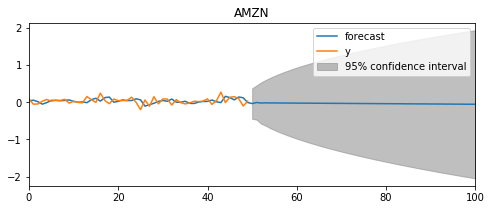

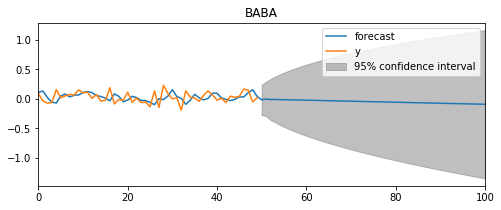

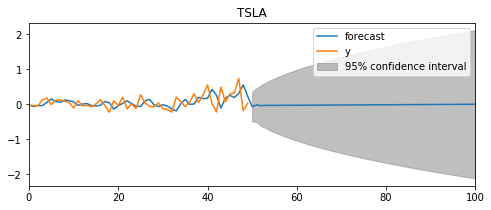

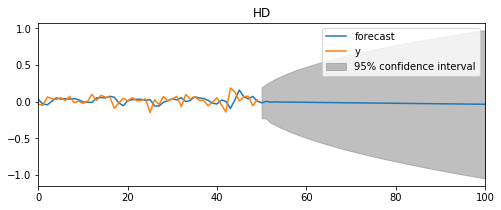

In [45]:
plt.rcParams["figure.figsize"] = (8,3)
models = {}
for symbol in list(symbols)[:5]:
    # p=1, q=1 and d=0 because adjclose_log_diff is already stationary
    model = ARIMA(stock_returns[symbol].values, order=(1,1,0))
    model_fit = model.fit(disp=0)
    models[symbol] = model_fit
    start = len(stock_returns[symbol].values)-50
    end = start + 100
    model_fit.plot_predict(dynamic=False,start=start,end=end)
    plt.title(symbol)
    plt.show()

In [55]:
predictions = []
for symbol in symbols:
    # p=1, q=1 and d=0 because adjclose_log_diff is already stationary
    model = ARIMA(stock_returns[symbol].values, order=(1,1,0))
    model_fit = model.fit(disp=0)
    start = len(stock_returns[symbol].values)-50
    end = start + 1
    result = model_fit.forecast()[0][0]
    record = {
        'symbol': symbol,
        'forecast': result
    }
    predictions.append(record)

In [56]:
predictions

[{'forecast': -0.03870367919582103, 'symbol': 'AMZN'},
 {'forecast': -0.020127155478637054, 'symbol': 'BABA'},
 {'forecast': -0.062363418795426534, 'symbol': 'TSLA'},
 {'forecast': -0.01756937333798609, 'symbol': 'HD'}]

In [57]:
pd.DataFrame(predictions)

,symbol,forecast
0,AMZN,-0.038704
1,BABA,-0.020127
2,TSLA,-0.062363
3,HD,-0.017569
